CASE -

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this case, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Data Dictionary

- Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

- Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

WORK FLOW -

Titanic Dataset

Data Pre Processing

Data Analysis

Train Test Split

Logistic Regression Model - It works well in binary classification (Survived/Not Survived)

Model Evaluation

Predictive System

Importing necessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [2]:
# Importing the data

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Titanic Passengers Survival Prediction Using Logistic Regression\Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking no of rows & columns

data.shape

(891, 12)

In [4]:
# Getting some information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Checking missing values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing values

In [11]:
# Dropping 'Cabin' column from dataset

data = data.drop(columns = 'Cabin', axis = 1)

In [6]:
# Replacing missing values in 'Age' column with mean value

data['Age'].fillna(data['Age'].mean(), inplace = True)

In [8]:
# Finding mode value of 'Embarked' column

print(data['Embarked'].mode()[0])

S


In [9]:
# Replacing the missing values in 'Embarked' column with mode value

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [12]:
# Checking missing values

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis & Visualization

In [13]:
# Statistical measures of data

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Finding the number of people who survived & not survived

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [15]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

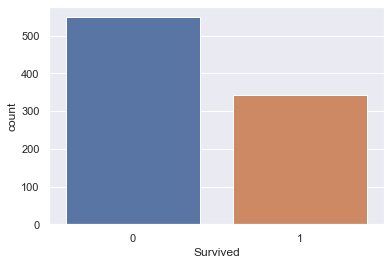

In [18]:
# Count plot for 'Survived' column

sns.countplot('Survived', data = data)

In [20]:
# Finding the number of male & not frmale

data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

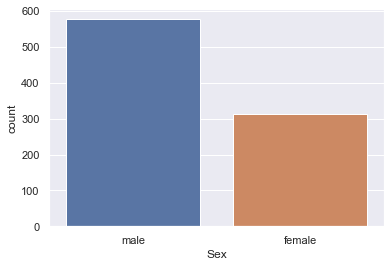

In [19]:
# Count plot for 'Sex' column

sns.countplot('Sex', data = data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

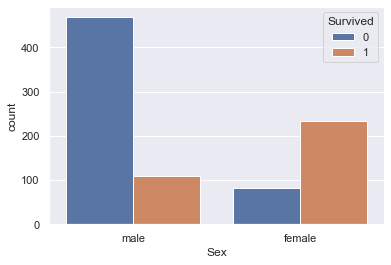

In [21]:
# Comparing no of survivors with gender

sns.countplot('Sex', hue = 'Survived', data = data)

Inference from above graph -

Number of Female Survivours is more.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

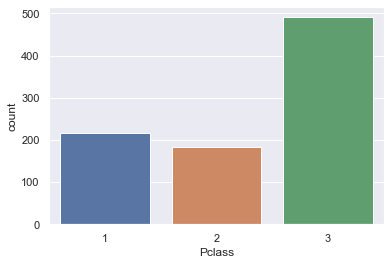

In [22]:
# Count plot for 'Pclass' column

sns.countplot('Pclass', data = data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

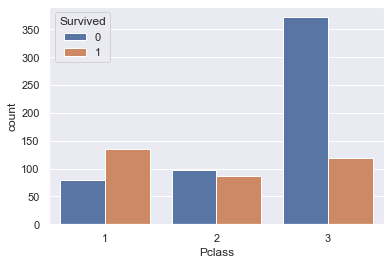

In [24]:
# Comparing no of survivors with Pclass

sns.countplot('Pclass', hue = 'Survived', data = data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

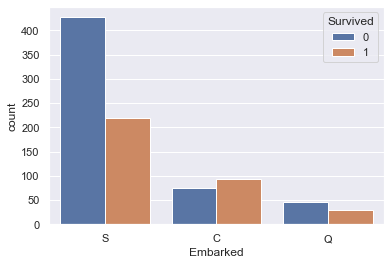

In [25]:
# Comparing no of survivors with Embarked

sns.countplot('Embarked', hue = 'Survived', data = data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

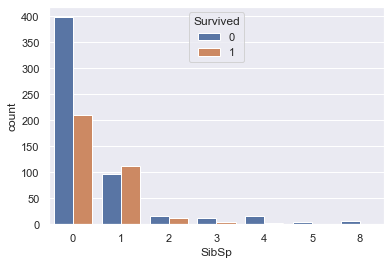

In [26]:
# Comparing no of survivors with SibSp

sns.countplot('SibSp', hue = 'Survived', data = data)

Encoding Categorical Columns

In [28]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# Converting categorical columns

data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating Features & Target

In [35]:
x = data.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)
y = data['Survived']

In [36]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [37]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into Train & Test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [39]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

Logistic Regression -

Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

That means Logistic regression is usually used for Binary classification problems.

Binary Classification refers to predicting the output variable that is discrete in two classes.

A few examples of Binary classification are Yes/No, Pass/Fail, Win/Lose, Cancerous/Non-cancerous, etc.

Types of Logistic Regression
- Simple Logistic Regression: a single independent is used to predict the output
- Multiple logistic regression: multiple independent variables are used to predict the output

Extensions of Logistic Regression

Although it is said Logistic regression is used for Binary Classification, it can be extended to solve multiclass classification problems.

- Multinomial Logistic Regression: The output variable is discrete in three or more classes with no natural ordering.

Food texture: Crunchy, Mushy, Crispy

Hair colour: Blonde, Brown, Brunette, Red​

- Ordered Logistic Regression: Aka Ordinal regression model. The output variable is discrete in three or more classes with the ordering of the levels.

Customer Rating: extremely dislike, dislike, neutral, like, extremely like

Income level: low income, middle income, high income

- How does Logistic Regression Work?

The logistic regression equation is quite similar to the linear regression model.

Consider we have a model with one predictor “x” and one Bernoulli response variable “ŷ” and p is the probability of ŷ=1. The linear equation can be written as:

p = b0+b1x     --------> eq 1

The right-hand side of the equation (b0+b1x) is a linear equation and can hold values that exceed the range (0,1). But we know probability will always be in the range of (0,1).

To overcome that, we predict odds instead of probability.

Odds: The ratio of the probability of an event occurring to the probability of an event not occurring.

Odds = p/(1-p)

The equation 1 can be re-written as:

p/(1-p) = b0+b1x      --------> eq 2

Odds can only be a positive value, to tackle the negative numbers, we predict the logarithm of odds.

Log of odds = ln(p/(1-p))

The equation 2 can be re-written as:

ln(p/(1-p)) = b0+b1x      --------> eq 3

To recover p from equation 3, we apply exponential on both sides.

exp(ln(p/(1-p))) = exp(b0+b1x)

eln(p/(1-p)) = e(b0+b1x)

From the inverse rule of logarithms,

p/(1-p) = e(b0+b1x)

Simple algebraic manipulations

p = (1-p) * e(b0+b1x)

p = e(b0+b1x)- p * e(b0+b1x)

Taking p as common on the right-hand side

p = p * ((e(b0+b1x))/p - e(b0+b1x))

p = e(b0+b1x) / (1 + e(b0+b1x))

Dividing numerator and denominator by e(b0+b1x) on the right-hand side

p = 1 / (1 + e-(b0+b1x))

Similarly, the equation for a logistic model with ‘n’ predictors is as below:

p = 1/ (1 + e-(b0+b1x1+b2x2+b3x3+----+bnxn)

The right side part looks familiar, isn’t it? Yes, it is the sigmoid function. It helps to squeeze the output to be in the range between 0 and 1.

- Sigmoid Function (S - Curve)

The sigmoid function is useful to map any predicted values of probabilities into another value between 0 and 1.

We started with a linear equation and ended up with a logistic regression model with the help of a sigmoid function.

Linear model: ŷ = b0+b1x

Sigmoid function: σ(z) = 1/(1+e−z)

Logistic regression model: ŷ = σ(b0+b1x) = 1/(1+e-(b0+b1x))

So, unlike linear regression, we get an ‘S’ shaped curve in logistic regression.

In [40]:
model = LogisticRegression()

In [41]:
# Training Logistic Regression model with Train data

model.fit(x_train, y_train)

LogisticRegression()

Model Evaluation

In [45]:
# Accuracy on train data

x_train_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(y_train, x_train_predict)
print('Accuracy Score of Train Data :', train_data_accuracy)

Accuracy Score of Train Data : 0.8075842696629213


In [46]:
# Accuracy on test data

x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_predict)
print('Accuracy Score of Test Data :', test_data_accuracy)

Accuracy Score of Test Data : 0.7821229050279329


CONCLUSION -

Accuracy score of our model in both cases is approximately equal, our model is not over/under fitted. Our model should be used for prediction

Predictive System

In [47]:
input_data = (3,    0,  22.000000,      1,      0 ,  7.2500,         0)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array for one sample
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
    print('The Person Has Not Survived')
else:
    print('The Person Has Survived')

[0]
The Person Has Not Survived
